In [1]:
import matplotlib.pylab as plt
import numpy as np
import pandas as pd
import time
import sys
import os

In [2]:
# preamble for jupyter notebook and django
import django
import platform

if platform.node() == "mcc-apsis":
    sys.path.append('/home/muef/tmv/BasicBrowser/')
else:
    # local paths
    sys.path.append('/media/Data/MCC/tmv/BasicBrowser/')

os.environ.setdefault("DJANGO_SETTINGS_MODULE", "BasicBrowser.settings")
django.setup()

# import from appended path
import parliament.models as pm
from parliament.tasks import do_search, run_tm
import cities.models as cmodels
from django.contrib.auth.models import User
from tmv_app.models import *
from utils.tm_mgmt import update_topic_scores
from django.db.models import Q, Count, Func, F, Sum, Avg, Value as V

from utils.topic_comparison import compare_topic_queryset, save_res, sort_matrix, draw_score_matrix
from utils.topic_comparison import save_topic_list_as_table, draw_bipartite_topic_graph, bipartite_graph_from_matrix

/home/finn/anaconda3/envs/textmining/lib/python3.7/site-packages/psycopg2/__init__.py:144: UserWarning: The psycopg2 wheel package will be renamed from release 2.8; in order to keep installing from binary please use "pip install psycopg2-binary" instead. For details see: <http://initd.org/psycopg/docs/install.html#binary-install-from-pypi>.
  """)


In [3]:
#RunStats.objects.filter(psearch__title="Kohle pdf utterance", method='NM', K=50)

In [4]:
K=30
method = 'NM'
search_word = "Kohle"
run_id1 = RunStats.objects.get(psearch__title="{} tei utterance".format(search_word), method=method, K=K).run_id
run_id2 = RunStats.objects.get(psearch__title="{} pdf utterance".format(search_word), method=method, K=K).run_id

stat1 = RunStats.objects.get(pk=run_id1)
topics1 = Topic.objects.filter(run_id=stat1.parent_run_id).order_by('-score')

stat2 = RunStats.objects.get(pk=run_id2)
topics2 = Topic.objects.filter(run_id=stat2.parent_run_id).order_by('-score')

In [5]:
save_topic_list_as_table(topics1, "topic_list_{}_{}_K{}_tei.csv".format(search_word, method, K))

0

['run_43_topics_30', 'scores_43', 'similarity_43-44', 'run_44_topics_30', 'scores_44']
C2:C30
matching sum:	228.0
max rows:	238.0
max cols:	230.0
matching sum:	228.0
max rows:	238.0
max cols:	230.0


0

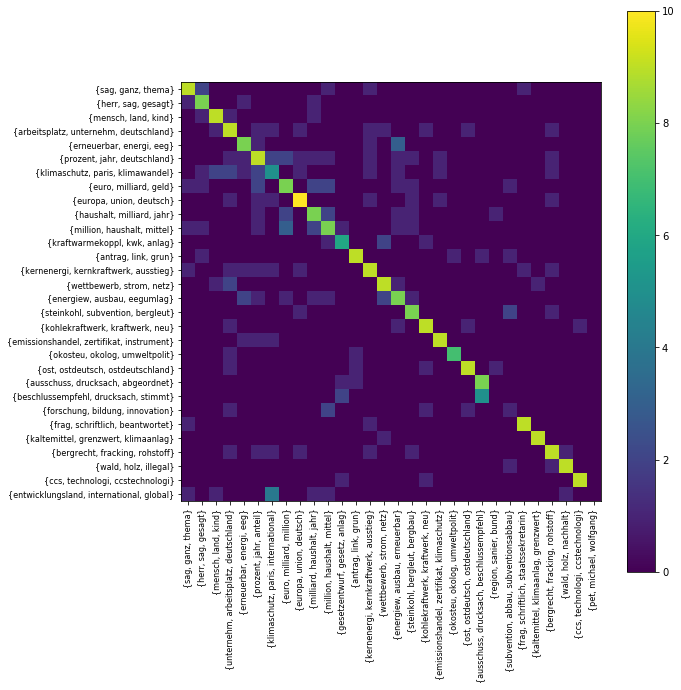

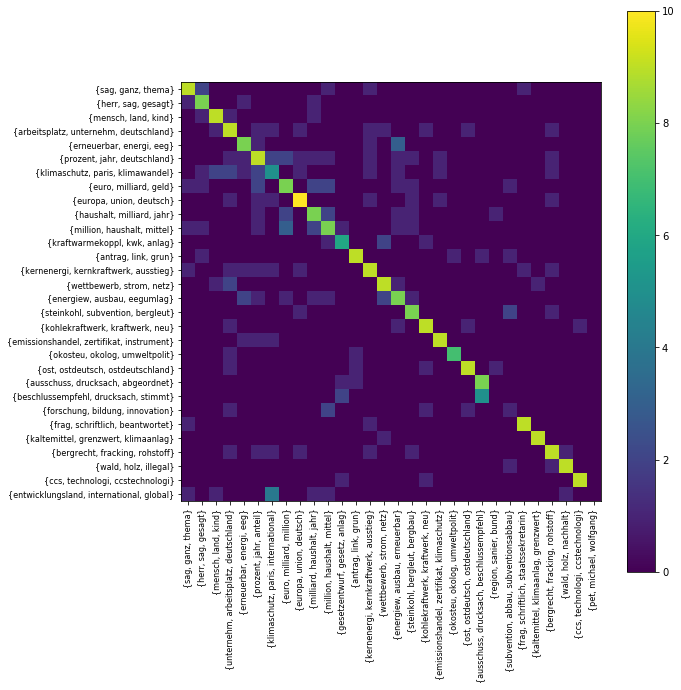

In [6]:
% matplotlib inline

runs = [run_id1, run_id2]
runs = RunStats.objects.filter(pk__in=runs).order_by('K')

res_tw, ss, score_matrix = compare_topic_queryset(runs, order_by_str='-score')
options = {'fname': "/media/Data/MCC/tmv_notebooks/comparison"}
save_res(runs, [res_tw,ss], options)

draw_score_matrix(score_matrix, topics1, topics2, match=True, filename="topword_score_matrix_{}_{}_K{}.pdf".format(search_word, method, K))
draw_score_matrix(score_matrix, topics1, topics2, match=True, filename="topword_score_matrix_{}_{}_K{}.png".format(search_word, method, K))

['run_43_topics_30', 'scores_43', 'similarity_43-44', 'run_44_topics_30', 'scores_44']
matching sum:	88.55158115941057
max rows:	95.43041197975595
max cols:	90.0288921275047
matching sum:	88.55158115941057
max rows:	95.43041197975595
max cols:	90.0288921275047


0

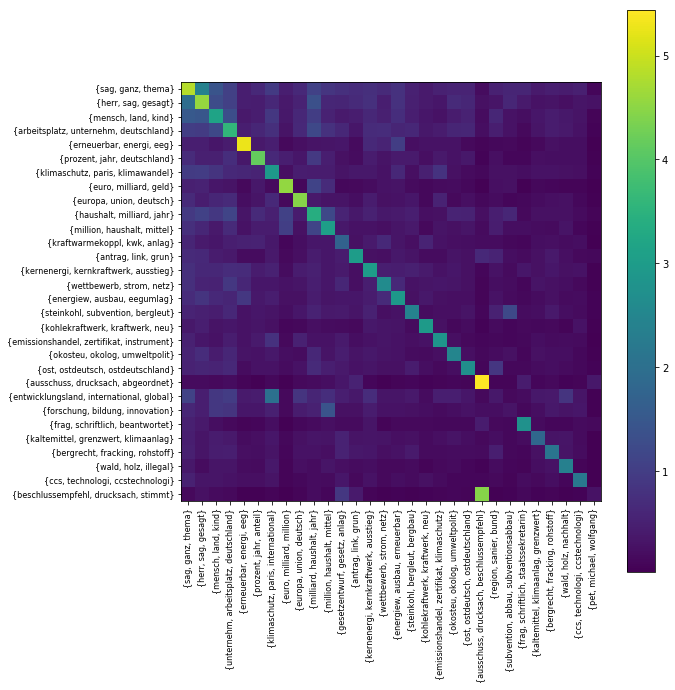

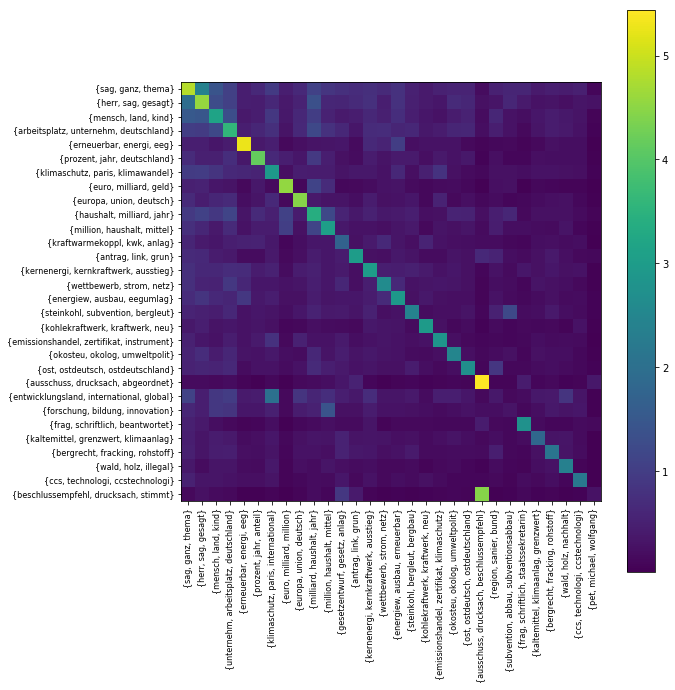

In [7]:
res, ss, score_prod_matrix = compare_topic_queryset(runs, method="score_product", order_by_str='-score')

draw_score_matrix(score_prod_matrix, topics1, topics2, match=True, filename="prod_score_matrix_{}_{}_K{}.pdf".format(search_word, method, K))
draw_score_matrix(score_prod_matrix, topics1, topics2, match=True, filename="prod_score_matrix_{}_{}_K{}.png".format(search_word, method, K))

In [8]:
matrix1, permutation1 = sort_matrix(score_matrix)
matrix2, permutation2 = sort_matrix(score_prod_matrix)

sum(permutation1 == permutation2)

matching sum:	228.0
max rows:	238.0
max cols:	230.0
matching sum:	88.55158115941057
max rows:	95.43041197975595
max cols:	90.0288921275047


28

In [9]:
from termcolor import colored

def print_topics(topics1, topics2):
    
    for i in range(len(topics1)):
        sim_score = len(set(topics1[i].top_words).intersection(set(topics2[i].top_words)))

        if topics1[i].top_words == topics2[i].top_words:
            print("#{}: score: {}, matching".format(i, sim_score))
        elif sim_score > 5:
            print("#{}: score: {}, not matching".format(i, sim_score))
        else:
            print(colored("#{}: score: {}, not matching".format(i, sim_score), 'red'))

        print("{}\n{}".format(", ".join(topics1[i].top_words), ", ".join(topics2[i].top_words)))

matrix1, permutation1 = sort_matrix(score_matrix)
topic_list1 = [topics1[int(permutation1[i])] for i in range(len(topics1))]
        
print_topics(topic_list1, topics2)

matching sum:	228.0
max rows:	238.0
max cols:	230.0
#0: score: 9, not matching
sag, ganz, thema, glaub, frag, darub, gibt, punkt, bereich, gesagt
sag, ganz, thema, glaub, gibt, bereich, darub, frag, punkt, wichtig
#1: score: 8, not matching
herr, sag, gesagt, dam, herrn, minist, bundeskanzl, polit, red, schon
herr, sag, gesagt, minist, dam, herrn, red, schon, frau, kolleg
#2: score: 9, not matching
mensch, land, kind, mehr, sozial, gesellschaft, merkel, dafur, polit, frau
mensch, land, kind, mehr, frau, sozial, gesellschaft, merkel, dafur, leb
#3: score: 9, not matching
arbeitsplatz, unternehm, deutschland, mittelstand, wirtschaft, arbeitslos, mehr, neu, wachstum, betrieb
unternehm, arbeitsplatz, deutschland, mittelstand, wirtschaft, neu, arbeitslos, mehr, wachstum, steu
#4: score: 8, not matching
erneuerbar, energi, eeg, ausbau, energiepolit, fossil, erneuerbareenergiengesetz, anteil, energiekonzept, energieversorg
erneuerbar, energi, eeg, ausbau, energiepolit, fossil, anteil, energie

In [10]:
matrix = score_matrix
if sum([row.max() for row in matrix]) > sum([col.max() for col in matrix.T]):
    permutation = [row.argmax() for row in matrix]
else:
    permutation = [col.argmax() for col in matrix.T]

topic_list2 = [topics2[int(permutation[i])] for i in range(K)]

print_topics(topics1, topic_list2)

#0: score: 9, not matching
sag, ganz, thema, glaub, frag, darub, gibt, punkt, bereich, gesagt
sag, ganz, thema, glaub, gibt, bereich, darub, frag, punkt, wichtig
#1: score: 8, not matching
herr, sag, gesagt, dam, herrn, minist, bundeskanzl, polit, red, schon
herr, sag, gesagt, minist, dam, herrn, red, schon, frau, kolleg
#2: score: 9, not matching
mensch, land, kind, mehr, sozial, gesellschaft, merkel, dafur, polit, frau
mensch, land, kind, mehr, frau, sozial, gesellschaft, merkel, dafur, leb
#3: score: 9, not matching
arbeitsplatz, unternehm, deutschland, mittelstand, wirtschaft, arbeitslos, mehr, neu, wachstum, betrieb
unternehm, arbeitsplatz, deutschland, mittelstand, wirtschaft, neu, arbeitslos, mehr, wachstum, steu
#4: score: 9, not matching
prozent, jahr, deutschland, anteil, ziel, erreich, tonn, pro, gas, zahl
prozent, jahr, anteil, ziel, deutschland, erreich, tonn, gas, pro, coemission
#5: score: 8, not matching
erneuerbar, energi, eeg, ausbau, energiepolit, fossil, erneuerbare

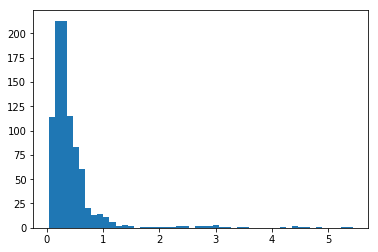

In [11]:
fig = plt.hist(score_prod_matrix.flatten(), bins=50)


matching sum:	228.0
max rows:	238.0
max cols:	230.0


0

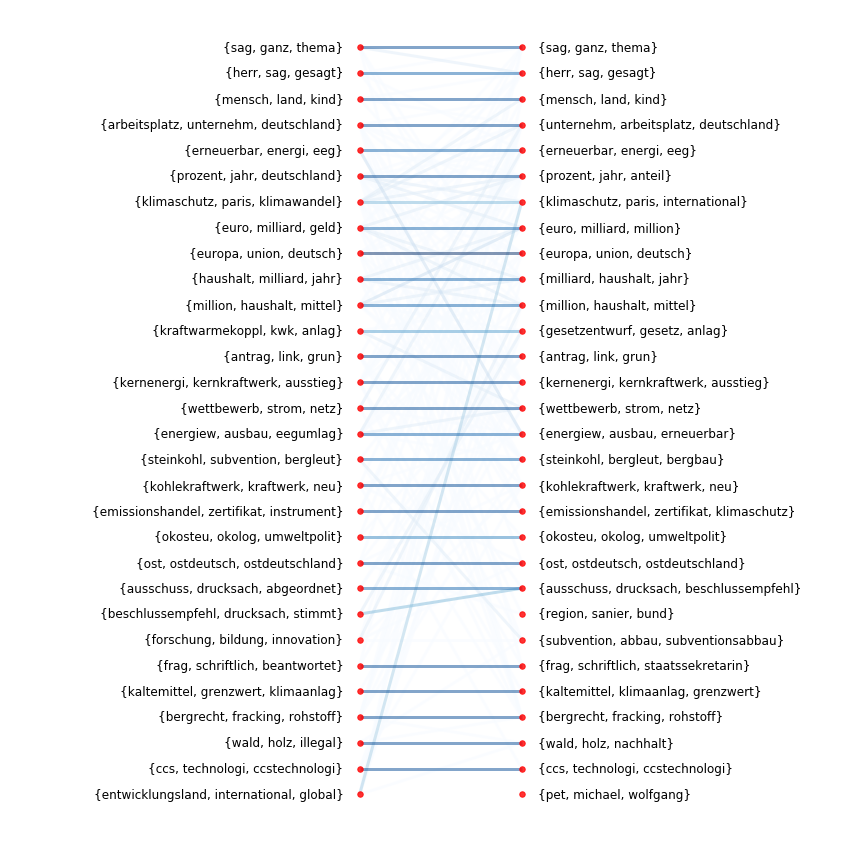

In [12]:
matrix2, permutation2 = sort_matrix(score_matrix)
#print(permutation)
g = bipartite_graph_from_matrix(matrix2, threshold=1)
perm_topic_list = [topics1[int(permutation2[i])].title for i in range(K)]
draw_bipartite_topic_graph(g, perm_topic_list, topics2, filename='bipartite_topic_graph_{}_{}_K{}_topword_score'.format(search_word, method, K))

matching sum:	88.55158115941057
max rows:	95.43041197975595
max cols:	90.0288921275047


0

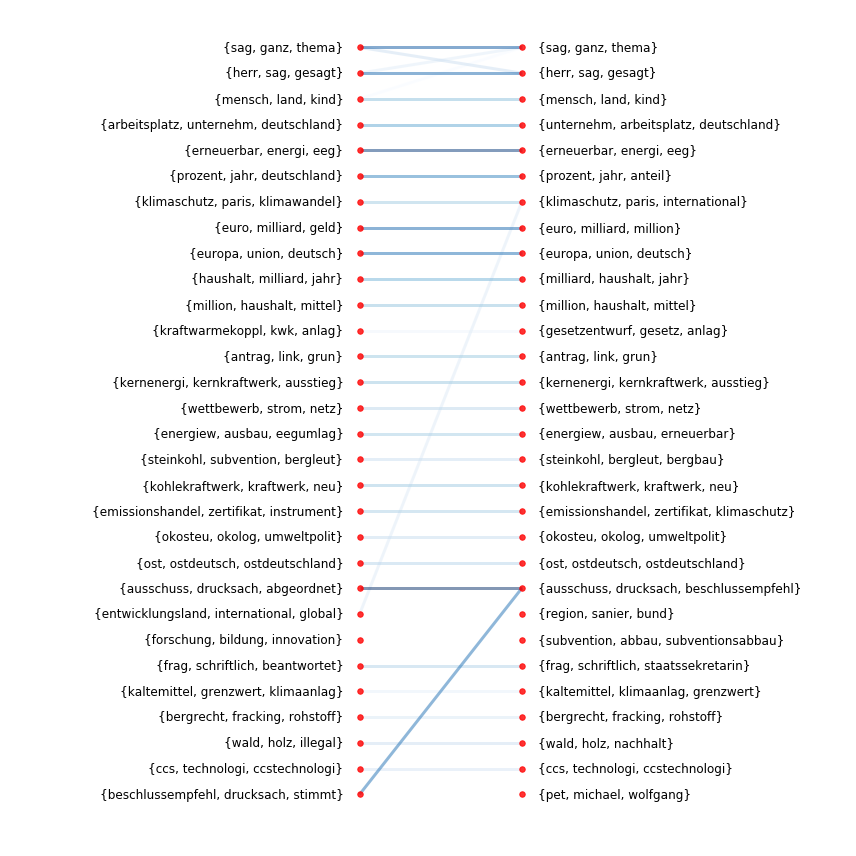

In [13]:
matrix1, permutation1 = sort_matrix(score_prod_matrix)
#print(permutation)
g = bipartite_graph_from_matrix(matrix1, threshold=1.5)
perm_topic_list = [topics1[int(permutation1[i])].title for i in range(K)]
draw_bipartite_topic_graph(g, perm_topic_list, topics2, filename="bipartite_topic_graph_{}_{}_K{}_prod_score".format(search_word, method, K))

matching sum:	88.55158115941057
max rows:	95.43041197975595
max cols:	90.0288921275047


0

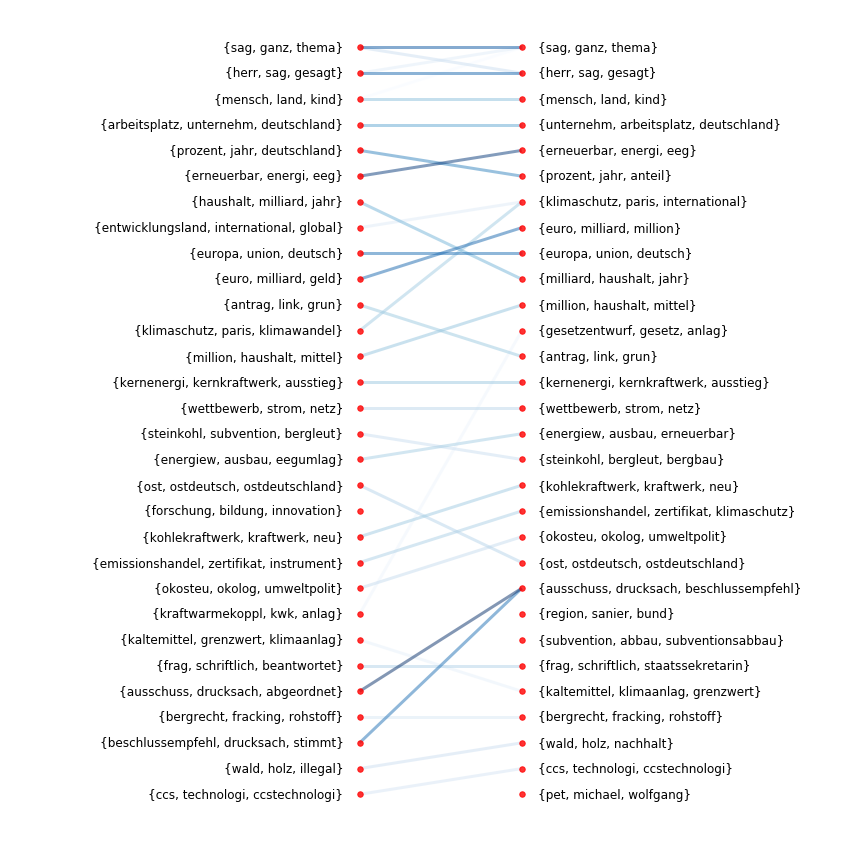

In [14]:
matrix1, permutation1 = sort_matrix(score_prod_matrix)
#print(permutation)
g = bipartite_graph_from_matrix(score_prod_matrix, threshold=1.5)
draw_bipartite_topic_graph(g, topics1, topics2, "bipartite_topic_graph_K{}_prod_score_not_sorted".format(K))